<a href="https://colab.research.google.com/github/bindal-tanmay/AI-Based-Estimation-of-Motor-Torque-Rotor-Temperature/blob/main/Estimation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [6]:
data=pd.read_csv('/content/drive/MyDrive/measures_v2.csv')
data=pd.DataFrame(data)
data=data.head(20000)

In [7]:
data=data.iloc[::2]
data=data.drop(['profile_id'],axis=1)
data

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541
...,...,...,...,...,...,...,...,...,...,...,...,...
19990,43.422371,18.848763,43.049110,-43.075310,35.512348,999.994446,-43.511269,132.617294,38.530270,29.482605,23.187275,103.073685
19992,43.422848,18.788467,43.088196,-43.078480,35.432941,999.987549,-43.512897,132.617126,38.522923,29.567225,23.202402,103.086838
19994,43.424286,18.653170,43.042332,-43.069290,35.464737,999.993408,-43.513161,132.617645,38.524117,29.603241,23.219015,103.073059
19996,43.427753,18.503746,43.045532,-43.071476,35.482121,1000.001709,-43.511280,132.617249,38.543098,29.565653,23.236431,103.074356


In [8]:
input_cols = ["u_q", "u_d", "i_q", "i_d", "motor_speed", "coolant", "ambient"]
X = data[input_cols]

In [9]:
# data['stator_winding'] = k1 * data['i_q']**2 + k2 * data['i_d']**2
# data['stator_tooth'] = k3 * data['u_q'] * data['i_q']
# data['stator_yoke'] = k4 * data['motor_speed'] * data['pm']**2


In [10]:
y = data[["torque"]].copy()  # torque target

# Compute rotor temperature proxy
data["rotor_temp_est"] = (
    0.6*data["pm"] + 0.2*data["stator_winding"] + 0.1*data["stator_tooth"] +
    0.05*data["stator_yoke"] + 0.05*data["coolant"]
)

y["rotor_temp_est"] = data["rotor_temp_est"]

In [11]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.2, random_state=42, shuffle=True
#)
from sklearn.model_selection import train_test_split

# Train+Val vs Test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Split Train+Val into Train and Val
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=42, shuffle=True
)

print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)



Train shape: (6400, 7)
Val shape: (1600, 7)
Test shape: (2000, 7)


In [12]:
print(" Features shape:", X_train.shape)
print(" Targets shape:", y_train.shape)
print("\n Example Features:\n", X_train.head())
print("\n Example Targets:\n", y_train.head())

 Features shape: (6400, 7)
 Targets shape: (6400, 2)

 Example Features:
               u_q        u_d        i_q         i_d  motor_speed    coolant  \
5158    86.848770 -96.533066  53.378166 -138.200211  4999.949219  18.758619   
14256  130.725708  -6.271852   0.782903  -97.004372  4999.946777  19.371599   
8164    86.803665 -96.907860  53.456139 -138.073196  4999.945801  18.609318   
5100    87.037003 -96.412125  53.379707 -138.563416  4999.949219  18.672371   
9852   130.539261  -6.268973   0.715847  -97.188675  4999.948242  18.192074   

         ambient  
5158   23.692017  
14256  24.669998  
8164   24.743290  
5100   24.740028  
9852   24.634529  

 Example Targets:
           torque  rotor_temp_est
5158   48.548683       64.210252
14256  -0.375145       48.124004
8164   48.600025       64.963435
5100   48.763783       64.115952
9852   -0.653823       51.460215


In [13]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)   # scale train set
#X_test = scaler.transform(X_test)         # scale test set using train stats

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train = scaler.fit_transform(X_train)

# Transform validation and test using the same scaler
X_val  = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [14]:
#ANN

from tensorflow.keras import layers, Input, models
inp = Input(shape=(X_train.shape[1],))
x = layers.Dense(32, activation="elu")(inp)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, activation="elu")(x)
x = layers.Dropout(0.2)(x)

# Two outputs
out_torque = layers.Dense(1, name="torque")(x)
out_temp   = layers.Dense(1, name="rotor_temp")(x)

model = models.Model(inputs=inp, outputs=[out_torque, out_temp])

model.compile(
    optimizer="adam",
    loss={"torque":"mse", "rotor_temp":"mse"},
    metrics={"torque":"mae", "rotor_temp":"mae"}
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │        528 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 16)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ torque (Dense)      │ (None, 1)         │         17 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rotor_temp (Dense)  │ (None, 1)         │         17 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 818 (3.20 KB)

 Trainable params: 818 (3.20 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#from sklearn.preprocessing import StandardScaler

# Scale targets (torque and rotor_temp)
#scaler_y = StandardScaler()
#y_train_scaled = scaler_y.fit_transform(y_train)
#y_test_scaled  = scaler_y.transform(y_test)

from sklearn.preprocessing import StandardScaler

# Scale targets (torque and rotor_temp)
scaler_y = StandardScaler()

y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled   = scaler_y.transform(y_val)
y_test_scaled  = scaler_y.transform(y_test)


In [16]:

# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# history = model.fit(
#     X_train,
#     {"torque": y_train_scaled[:,0], "rotor_temp": y_train_scaled[:,1]},
#     validation_data=(X_test, {"torque": y_test_scaled[:,0], "rotor_temp": y_test_scaled[:,1]}),
#     epochs=50,
#     batch_size=512,
#     callbacks=[early_stop],
#     verbose=1
# )


from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    X_train,
    {"torque": y_train_scaled[:, 0], "rotor_temp": y_train_scaled[:, 1]},
    validation_data=(
        X_val,
        {"torque": y_val_scaled[:, 0], "rotor_temp": y_val_scaled[:, 1]}
    ),
    epochs=50,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 4.2187 - rotor_temp_loss: 1.7974 - rotor_temp_mae: 1.1083 - torque_loss: 2.4161 - torque_mae: 1.2606 - val_loss: 2.0993 - val_rotor_temp_loss: 1.1124 - val_rotor_temp_mae: 0.8955 - val_torque_loss: 0.9378 - val_torque_mae: 0.8065
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0763 - rotor_temp_loss: 1.1166 - rotor_temp_mae: 0.8590 - torque_loss: 0.9579 - torque_mae: 0.7770 - val_loss: 0.9048 - val_rotor_temp_loss: 0.6319 - val_rotor_temp_mae: 0.6470 - val_torque_loss: 0.2336 - val_torque_mae: 0.3932
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1194 - rotor_temp_loss: 0.7138 - rotor_temp_mae: 0.6669 - torque_loss: 0.4055 - torque_mae: 0.4921 - val_loss: 0.4755 - val_rotor_temp_loss: 0.3787 - val_rotor_temp_mae: 0.4566 - val_torque_loss: 0.0651 - val_torque_mae: 0.1977
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8074 - rotor_temp_loss: 0.5229 - rotor_temp_mae: 0.5467 - torque_loss: 0

In [17]:
# # Predict on train and test
# y_pred_train_scaled = model.predict(X_train)
# y_pred_test_scaled  = model.predict(X_test)

# # Inverse transform to original scale
# y_pred_train = scaler_y.inverse_transform(np.column_stack(y_pred_train_scaled))
# y_pred_test  = scaler_y.inverse_transform(np.column_stack(y_pred_test_scaled))

# # Separate outputs
# y_pred_train_torque = y_pred_train[:,0]
# y_pred_train_rotor  = y_pred_train[:,1]

# y_pred_test_torque = y_pred_test[:,0]
# y_pred_test_rotor  = y_pred_test[:,1]

# # Train/Test R²
# r2_train_torque = r2_score(y_train["torque"], y_pred_train_torque)
# r2_test_torque  = r2_score(y_test["torque"], y_pred_test_torque)

# r2_train_rotor  = r2_score(y_train["rotor_temp_est"], y_pred_train_rotor)
# r2_test_rotor   = r2_score(y_test["rotor_temp_est"], y_pred_test_rotor)

# print(f"Train R² Torque: {r2_train_torque:.4f}, Rotor Temp: {r2_train_rotor:.4f}")
# print(f"Test R²  Torque: {r2_test_torque:.4f}, Rotor Temp: {r2_test_rotor:.4f}")

# Predict on train, val, and test
y_pred_train_scaled = model.predict(X_train)
y_pred_val_scaled   = model.predict(X_val)
y_pred_test_scaled  = model.predict(X_test)

# Inverse transform back to original scale
y_pred_train = scaler_y.inverse_transform(np.column_stack(y_pred_train_scaled))
y_pred_val   = scaler_y.inverse_transform(np.column_stack(y_pred_val_scaled))
y_pred_test  = scaler_y.inverse_transform(np.column_stack(y_pred_test_scaled))

# Separate outputs
y_pred_train_torque = y_pred_train[:, 0]
y_pred_train_rotor  = y_pred_train[:, 1]

y_pred_val_torque = y_pred_val[:, 0]
y_pred_val_rotor  = y_pred_val[:, 1]

y_pred_test_torque = y_pred_test[:, 0]
y_pred_test_rotor  = y_pred_test[:, 1]

# R² scores
from sklearn.metrics import r2_score

# Train
r2_train_torque = r2_score(y_train["torque"], y_pred_train_torque)
r2_train_rotor  = r2_score(y_train["rotor_temp_est"], y_pred_train_rotor)

# Validation
r2_val_torque = r2_score(y_val["torque"], y_pred_val_torque)
r2_val_rotor  = r2_score(y_val["rotor_temp_est"], y_pred_val_rotor)

# Test
r2_test_torque = r2_score(y_test["torque"], y_pred_test_torque)
r2_test_rotor  = r2_score(y_test["rotor_temp_est"], y_pred_test_rotor)

# Print results
print(f"Train R² Torque: {r2_train_torque:.4f}, Rotor Temp: {r2_train_rotor:.4f}")
print(f"Val   R² Torque: {r2_val_torque:.4f}, Rotor Temp: {r2_val_rotor:.4f}")
print(f"Test  R² Torque: {r2_test_torque:.4f}, Rotor Temp: {r2_test_rotor:.4f}")



200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train R² Torque: 0.9970, Rotor Temp: 0.9007
Val   R² Torque: 0.9947, Rotor Temp: 0.8995
Test  R² Torque: 0.9943, Rotor Temp: 0.8971


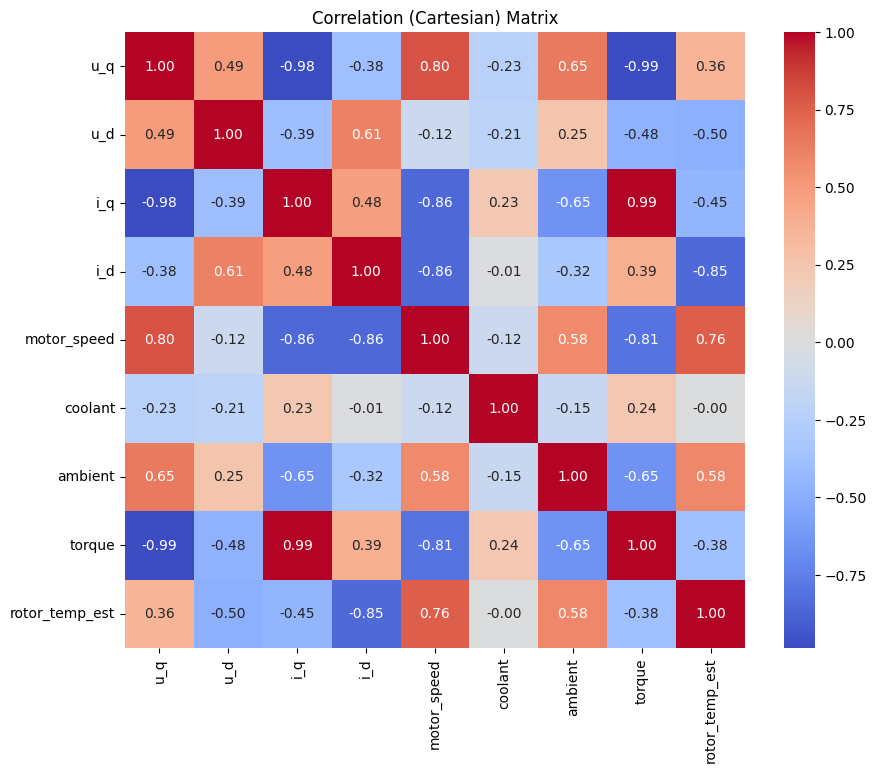

In [18]:
#%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = data[input_cols + ["torque", "rotor_temp_est"]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation (Cartesian) Matrix")
plt.show()


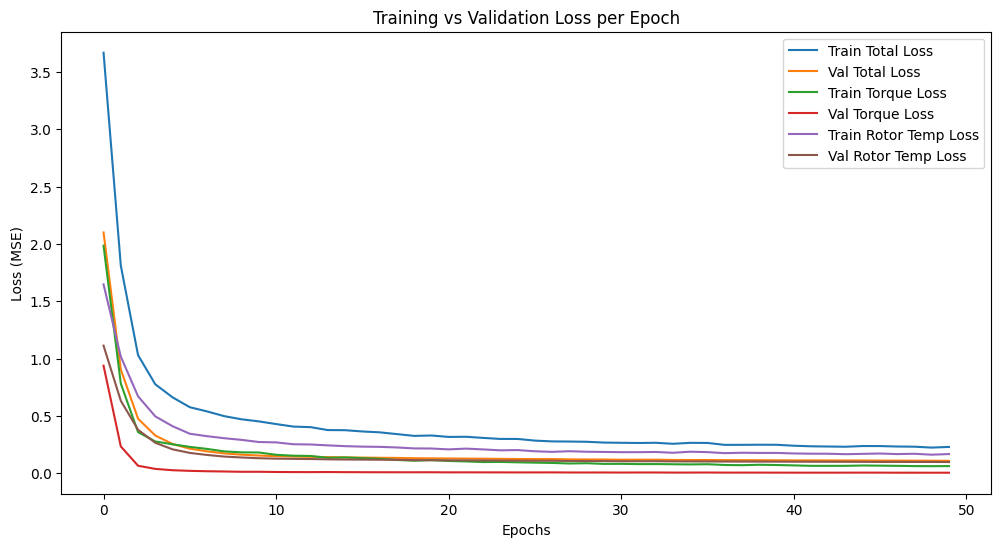

In [19]:
# Plot training & validation loss for both outputs
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Total Loss')
plt.plot(history.history['val_loss'], label='Val Total Loss')

plt.plot(history.history['torque_loss'], label='Train Torque Loss')
plt.plot(history.history['val_torque_loss'], label='Val Torque Loss')

plt.plot(history.history['rotor_temp_loss'], label='Train Rotor Temp Loss')
plt.plot(history.history['val_rotor_temp_loss'], label='Val Rotor Temp Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss per Epoch")
plt.legend()
plt.show()

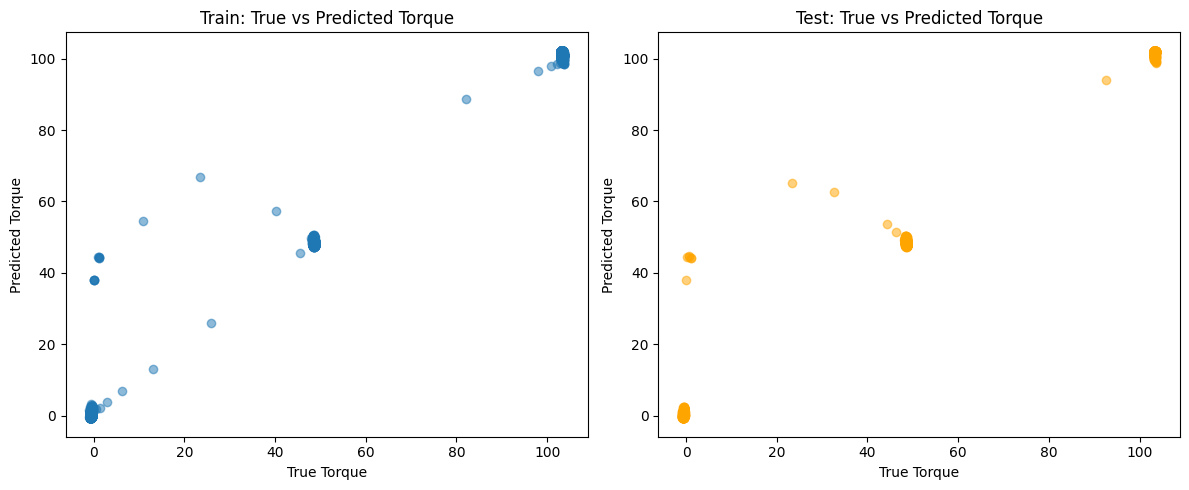

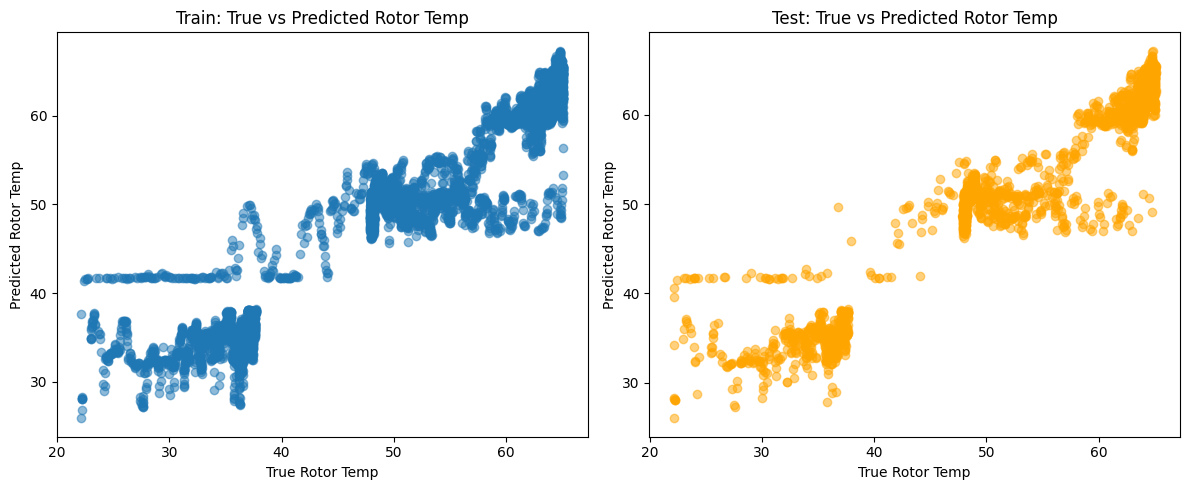

In [20]:
# Torque: Train vs Test
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_train["torque"], y_pred_train_torque, alpha=0.5)
plt.xlabel("True Torque")
plt.ylabel("Predicted Torque")
plt.title("Train: True vs Predicted Torque")

plt.subplot(1,2,2)
plt.scatter(y_test["torque"], y_pred_test_torque, alpha=0.5, color="orange")
plt.xlabel("True Torque")
plt.ylabel("Predicted Torque")
plt.title("Test: True vs Predicted Torque")

plt.tight_layout()
plt.show()


# Rotor Temp: Train vs Test
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_train["rotor_temp_est"], y_pred_train_rotor, alpha=0.5)
plt.xlabel("True Rotor Temp")
plt.ylabel("Predicted Rotor Temp")
plt.title("Train: True vs Predicted Rotor Temp")

plt.subplot(1,2,2)
plt.scatter(y_test["rotor_temp_est"], y_pred_test_rotor, alpha=0.5, color="orange")
plt.xlabel("True Rotor Temp")
plt.ylabel("Predicted Rotor Temp")
plt.title("Test: True vs Predicted Rotor Temp")

plt.tight_layout()
plt.show()

